In [1]:
from clusterfrac.cluster import star_cluster
from clusterfrac.estimator import param_estimator
from clusterfrac.model import cluster_model
from maths.points.ra_dec import ra_dec_project
from maths.points.fuse_points import fuse_close_companions
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Ellipse

## either generate models from scratch, or read them in (depending on comments)

'''

model_2d2d=cluster_model("2d2d")


data_2d2d_0=model_2d2d.make_training_data(32,100,15000)
data_2d2d_0.to_csv("data_2d2d_0.dat")


data_2d2d_1=model_2d2d.make_training_data(100,316,15000)
data_2d2d_1.to_csv("data_2d2d_1.dat")


data_2d2d_2=model_2d2d.make_training_data(316,1000,15000)
data_2d2d_2.to_csv("data_2d2d_2.dat")



model_3d2d=cluster_model("3d2d")
data_3d2d_0=model_3d2d.make_training_data(32,100,10000)
data_3d2d_0.to_csv("data_3d2d_0.dat")

data_3d2d_1=model_3d2d.make_training_data(100,316,15000)
data_3d2d_1.to_csv("data_3d2d_1.dat")

data_3d2d_2=model_3d2d.make_training_data(316,1000,15000)
data_3d2d_2.to_csv("data_3d2d_2.dat")
'''

"""


data_3d3d_0=model_3d3d.make_training_data(32,100,15000)
data_3d3d_0.to_csv("data_3d3d_0.dat")

data_3d3d_1=model_3d3d.make_training_data(100,316,15000)
data_3d3d_1.to_csv("data_3d3d_1.dat")

model_3d3d=cluster_model("3d3d")
data_3d3d_2=model_3d3d.make_training_data(316,1000,15000)
data_3d3d_2.to_csv("clusterfrac/data_3d3d_2.dat")
"""


model_3d3d=cluster_model("3d3d")

#data_orion=model_3d3d.make_training_data(682,682,10000)
#data_orion.to_csv("clusterfrac/data_orion.dat")
data_orion=pd.read_csv("clusterfrac/data_orion.dat")
estimator_orion=param_estimator(data_orion)

#data_taurus=model_3d3d.make_training_data(438,438,10000)
#data_taurus.to_csv("clusterfrac/data_taurus.dat")
data_taurus=pd.read_csv("clusterfrac/data_taurus.dat")
estimator_taurus=param_estimator(data_taurus)


data_2d2d_0=pd.read_csv("clusterfrac/data_2d2d_0.dat")
estimator_2d2d_0=param_estimator(data_2d2d_0)

data_2d2d_1=pd.read_csv("clusterfrac/data_2d2d_1.dat")
estimator_2d2d_1=param_estimator(data_2d2d_1)

data_2d2d_2=pd.read_csv("clusterfrac/data_2d2d_2.dat")
estimator_2d2d_2=param_estimator(data_2d2d_2)

"""
data_3d2d_0=pd.read_csv("clusterfrac/data_3d2d_0.dat")
estimator_3d2d_0=param_estimator(data_3d2d_0)

data_3d2d_1=pd.read_csv("clusterfrac/data_3d2d_1.dat")
estimator_3d2d_1=param_estimator(data_3d2d_1)

data_3d2d_2=pd.read_csv("clusterfrac/data_3d2d_2.dat")
estimator_3d2d_2=param_estimator(data_3d2d_2)

data_3d3d_0=pd.read_csv("clusterfrac/data_3d3d_0.dat")
estimator_3d3d_0=param_estimator(data_3d3d_0)

data_3d3d_1=pd.read_csv("clusterfrac/data_3d3d_1.dat")
estimator_3d3d_1=param_estimator(data_3d3d_1)
"""

data_3d3d_2=pd.read_csv("clusterfrac/data_3d3d_2.dat")
estimator_3d3d_2=param_estimator(data_3d3d_2)

radial_cluster=pd.read_csv("clusterfrac/radial_cluster.dat")
fractal_cluster=pd.read_csv("clusterfrac/fractal_cluster.dat")

/home/olomax/Documents/Projects/LEAPS/LEAPS2019/clusterfrac/estimator.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_table["H_est"]=Y[:,0]
/home/olomax/Documents/Projects/LEAPS/LEAPS2019/clusterfrac/estimator.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_table["sigma_est"]=Y[:,1]
/home/olomax/Documents/Projects/LEAPS/LEAPS2019/clusterfrac/estimator.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

/home/olomax/Documents/Projects/LEAPS/LEAPS2019/clusterfrac/estimator.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_table["sigma_est"]=Y[:,1]


In [2]:
# set distances (parsecs) to example YSO clusters


taurus_dist=140
chai_dist=160
ic348_dist=315
lupus3_dist=170
ophiuchus_dist=130
ic2391_dist=150

# We assume that objects closer than this (in parsecs) are multiple systems.
# Fuse them together
cc_dist=0.005



# Reading in YSO data from text files and convert them to x-y Cartesian coords

taurus_pos=np.loadtxt("clusterfrac/yso_taurus.txt")
taurus_x=ra_dec_project(taurus_pos[:,:3],taurus_pos[:,3:])[:,:2]*taurus_dist
taurus_x=fuse_close_companions(taurus_x,cc_dist)
taurus=star_cluster(taurus_x)

chai_pos=np.loadtxt("clusterfrac/yso_chai.txt")
chai_x=ra_dec_project(chai_pos[:,:3],chai_pos[:,3:])[:,:2]*chai_dist
chai_x=fuse_close_companions(chai_x,cc_dist)
chai=star_cluster(chai_x)

ic348_pos=np.loadtxt("clusterfrac/yso_ic348.txt")
ic348_x=ra_dec_project(ic348_pos[:,:3],ic348_pos[:,3:])[:,:2]*ic348_dist
ic348_x=fuse_close_companions(ic348_x,cc_dist)
ic348=star_cluster(ic348_x)

lupus3_pos=np.loadtxt("clusterfrac/yso_lupus3.txt")
lupus3_x=ra_dec_project(lupus3_pos[:,:3],lupus3_pos[:,3:])[:,:2]*lupus3_dist
lupus3_x=fuse_close_companions(lupus3_x,cc_dist)
lupus3=star_cluster(lupus3_x)

ophiuchus_pos=np.loadtxt("clusterfrac/yso_ophiuchus.txt")
ophiuchus_x=ra_dec_project(ophiuchus_pos[:,:3],ophiuchus_pos[:,3:])[:,:2]*ophiuchus_dist
ophiuchus_x=fuse_close_companions(ophiuchus_x,cc_dist)
ophiuchus=star_cluster(ophiuchus_x)

ic2391_pos=np.loadtxt("clusterfrac/stars_ic2391.txt")
ic2391_x=ra_dec_project(ic2391_pos[:,:3],ic2391_pos[:,3:])[:,:2]*ic2391_dist
ic2391_x=fuse_close_companions(ic2391_x,cc_dist)
ic2391=star_cluster(ic2391_x)


# use x-y data to generate graph statisics data row
taurus_table=taurus.make_table_row()
chai_table=chai.make_table_row()
ic348_table=ic348.make_table_row()
lupus3_table=lupus3.make_table_row()
ophiuchus_table=ophiuchus.make_table_row()
ic2391_table=ic2391.make_table_row()

Generating Delaunay triangulation.
Converting triangulation to sparse matrix format.
Generating minimum spanning tree.
All graphs generated.
Generating Delaunay triangulation.
Converting triangulation to sparse matrix format.
Generating minimum spanning tree.
All graphs generated.
Generating Delaunay triangulation.
Converting triangulation to sparse matrix format.
Generating minimum spanning tree.
All graphs generated.
Generating Delaunay triangulation.
Converting triangulation to sparse matrix format.
Generating minimum spanning tree.
All graphs generated.
Generating Delaunay triangulation.
Converting triangulation to sparse matrix format.
Generating minimum spanning tree.
All graphs generated.
Generating Delaunay triangulation.
Converting triangulation to sparse matrix format.
Generating minimum spanning tree.
All graphs generated.


In [3]:
# use trained regressor to estimate parameters
# print a load of stuff

estimator_2d2d_1.estimate_params(taurus_table)

print("taurus")
print(taurus_table)
print()


estimator_2d2d_1.estimate_params(chai_table)

print("chai")
print(chai_table)
print()

estimator_2d2d_2.estimate_params(ic348_table)

print("ic348")
print(ic348_table)
print()

estimator_2d2d_0.estimate_params(lupus3_table)

print("lupus3")
print(lupus3_table)



estimator_2d2d_1.estimate_params(ophiuchus_table)

print("ophiuchus")
print(ophiuchus_table)
print()

estimator_2d2d_1.estimate_params(ic2391_table)

print("ic2391")
print(ic2391_table)
print()

taurus
   N_star    R_hull    m_mean      m_m2      m_m3      m_m4    s_mean  \
0   335.0  4.062128  1.507765  2.724314  4.391856  6.053937  1.698297   

       s_m2      s_m3     s_m4     H_est  sigma_est  
0  1.056308  0.826843  1.34062  0.205082   3.248492  

chai
   N_star    R_hull    m_mean      m_m2      m_m3      m_m4    s_mean  \
0   234.0  5.764974  2.545659  4.023451  6.409064  8.841621  1.662443   

       s_m2      s_m3      s_m4     H_est  sigma_est  
0  1.111883  1.174521  1.666598  0.430571   2.683052  

ic348
   N_star    R_hull   m_mean      m_m2      m_m3      m_m4    s_mean  \
0   350.0  4.933639  2.90091  2.551472  3.467101  4.764035  1.745289   

       s_m2      s_m3      s_m4     H_est  sigma_est  
0  0.976712  0.874018  1.325582  0.830756   1.054887  

lupus3
   N_star    R_hull    m_mean     m_m2      m_m3       m_m4    s_mean  \
0    67.0  5.139166  2.741455  5.38916  9.459509  13.273468  1.428366   

       s_m2      s_m3      s_m4     H_est  sigma_est  
0  

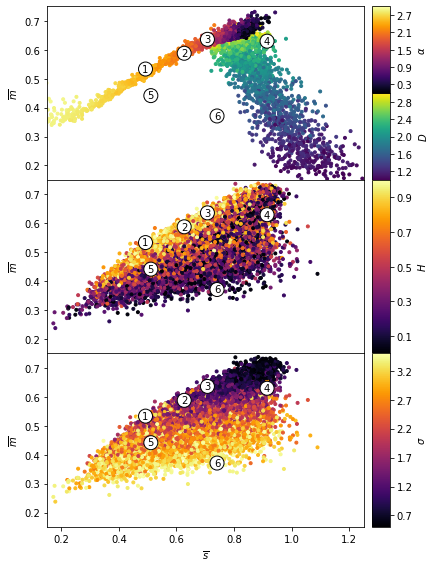

In [4]:
# pack data into numpy array to make plotting easier
observations=np.zeros((6,2))
observations[5,:]=[taurus_table["s_mean"]/taurus_table["R_hull"],taurus_table["m_mean"]/taurus_table["R_hull"]]
observations[4,:]=[chai_table["s_mean"]/chai_table["R_hull"],chai_table["m_mean"]/chai_table["R_hull"]]
observations[1,:]=[ic348_table["s_mean"]/ic348_table["R_hull"],ic348_table["m_mean"]/ic348_table["R_hull"]]
observations[0,:]=[lupus3_table["s_mean"]/lupus3_table["R_hull"],lupus3_table["m_mean"]/lupus3_table["R_hull"]]
observations[2,:]=[ophiuchus_table["s_mean"]/ophiuchus_table["R_hull"],ophiuchus_table["m_mean"]/ophiuchus_table["R_hull"]]
observations[3,:]=[ic2391_table["s_mean"]/ic2391_table["R_hull"],ic2391_table["m_mean"]/ic2391_table["R_hull"]]



# make m-bar s-bar plot

fig_2=plt.figure(figsize=(6.,8.))
ax=[fig_2.add_subplot(3,1,i+1) for i in range(3)]


D_ax=ax[0].scatter(np.sqrt(np.pi)*fractal_cluster["s_mean"]/fractal_cluster["R_hull"],fractal_cluster["m_mean"]/fractal_cluster["R_hull"],marker=".",c=fractal_cluster["D"],cmap=plt.cm.viridis)
alpha_ax=ax[0].scatter(np.sqrt(np.pi)*radial_cluster["s_mean"]/radial_cluster["R_hull"],radial_cluster["m_mean"]/radial_cluster["R_hull"],marker=".",c=radial_cluster["alpha"],cmap=plt.cm.inferno)

bbox_props=dict(boxstyle="circle",fc="white",pad=0.2)

for i in range(observations.shape[0]):
    ax[0].text(np.sqrt(np.pi)*observations[i,0],observations[i,1],i+1,ha="center",va="center",bbox=bbox_props)
    
ax[0].set_xlim(0.15,1.25)
ax[0].set_ylim(0.15,0.75)
ax[0].set_ylabel(r"$\overline{m}$")
ax[0].set_xticks([])

D_ax.set_clim(1.,3.)
alpha_ax.set_clim(0.,3.)


H_ax=ax[1].scatter(np.sqrt(np.pi)*data_2d2d_1["s_mean"]/data_2d2d_1["R_hull"],data_2d2d_1["m_mean"]/data_2d2d_1["R_hull"],marker=".",c=data_2d2d_1["H"],cmap=plt.cm.inferno)

for i in range(observations.shape[0]):
    ax[1].text(np.sqrt(np.pi)*observations[i,0],observations[i,1],i+1,ha="center",va="center",bbox=bbox_props)
    
ax[1].set_xlim(0.15,1.25)
ax[1].set_ylim(0.15,0.75)
ax[1].set_ylabel(r"$\overline{m}$")
ax[1].set_xticks([])

H_ax.set_clim(0.,1.)

sigma_ax=ax[2].scatter(np.sqrt(np.pi)*data_2d2d_1["s_mean"]/data_2d2d_1["R_hull"],data_2d2d_1["m_mean"]/data_2d2d_1["R_hull"],marker=".",c=data_2d2d_1["sigma"],cmap=plt.cm.inferno)

for i in range(observations.shape[0]):
    ax[2].text(np.sqrt(np.pi)*observations[i,0],observations[i,1],i+1,ha="center",va="center",bbox=bbox_props)


ax[2].set_xlim(0.15,1.25)
ax[2].set_ylim(0.15,0.75)
ax[2].set_xlabel(r"$\overline{s}$")
ax[2].set_ylabel(r"$\overline{m}$")

sigma_ax.set_clim(0.5,3.5)


fig_2.tight_layout()
fig_2.subplots_adjust(hspace=0,right=0.85)


pos=ax[0].get_position()
cbar_ax = fig_2.add_axes([0.87, pos.y0, 0.04, 0.5*(pos.y1-pos.y0)])
D_cb=fig_2.colorbar(D_ax, cax=cbar_ax,ticks=np.linspace(1.2,2.8,5),label=r"$D$")

pos=ax[0].get_position()
cbar_ax = fig_2.add_axes([0.87, pos.y0+0.5*(pos.y1-pos.y0), 0.04, 0.5*(pos.y1-pos.y0)])
alpha_cb=fig_2.colorbar(alpha_ax, cax=cbar_ax,ticks=np.linspace(0.3,2.7,5),label=r"$\alpha$")


pos=ax[1].get_position()
cbar_ax = fig_2.add_axes([0.87, pos.y0, 0.04, pos.y1-pos.y0])
H_cb=fig_2.colorbar(H_ax, cax=cbar_ax,ticks=np.linspace(0.1,0.9,5),label=r"$H$")


pos=ax[2].get_position()
cbar_ax = fig_2.add_axes([0.87, pos.y0, 0.04, pos.y1-pos.y0])
sigma_cb=fig_2.colorbar(sigma_ax, cax=cbar_ax,ticks=np.linspace(0.7,3.2,6),label=r"$\sigma$")


plt.show()

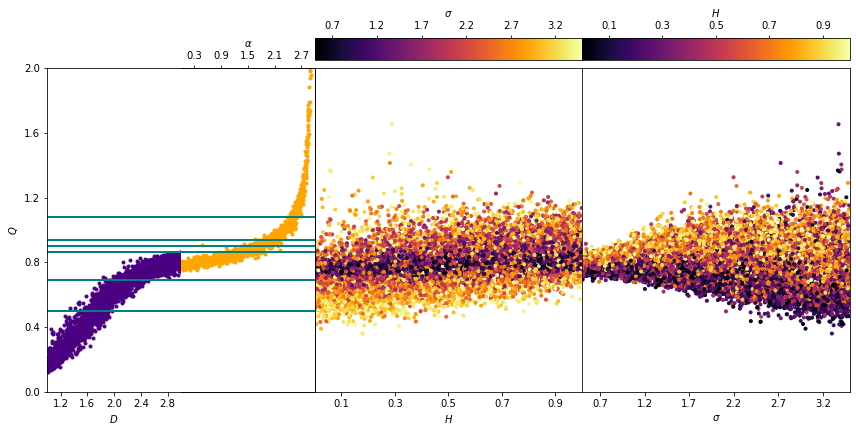

In [5]:
#make Q plot

fig_3,ax=plt.subplots(1,4,figsize=(12.,6.),gridspec_kw = {'width_ratios':[1, 1,2,2]})

ax[1].set_yticks([])
ax[2].set_yticks([])
ax[3].set_yticks([])

D_ax=ax[0].scatter(fractal_cluster["D"],fractal_cluster["m_mean"]/(np.sqrt(np.pi)*fractal_cluster["s_mean"]),c="indigo",marker=".")

ax[0].set_xlim(1,3)
ax[0].set_ylim(0,2)
ax[0].set_xticks(np.linspace(1.2,2.8,5))
ax[0].set_xlabel(r"$D$",)
ax[0].set_ylabel(r"$Q$")
ax[0].set_yticks(np.linspace(0,2,6))
ax[0].spines["right"].set_visible(False)

for i in range(observations.shape[0]):
    ax[0].plot(np.linspace(1,3,10),[observations[i,1]/(np.sqrt(np.pi)*observations[i,0])]*10,color="teal",linewidth=2)



alpha_ax=ax[1].scatter((radial_cluster["alpha"]),radial_cluster["m_mean"]/(np.sqrt(np.pi)*radial_cluster["s_mean"]),c="orange",marker=".")

ax[1].set_xlim(0,3)
ax[1].set_ylim(0,2)
ax[1].set_xticks([])
ax[1].spines["left"].set_visible(False)

for i in range(observations.shape[0]):
    ax[1].plot(np.linspace(0,3,10),[observations[i,1]/(np.sqrt(np.pi)*observations[i,0])]*10,color="teal",linewidth=2)


ax_top=ax[1].twiny()
ax_top.set_xlim(0,3)
ax_top.set_xticks(np.linspace(0.3,2.7,5))
ax_top.set_xlabel(r"$\alpha$")
ax_top.spines["left"].set_visible(False)

H_ax=ax[2].scatter((data_2d2d_1["H"]),data_2d2d_1["m_mean"]/(np.sqrt(np.pi)*data_2d2d_1["s_mean"]),c=data_2d2d_1["sigma"],cmap=plt.cm.inferno,marker=".")

ax[2].set_xlim(0,1)
ax[2].set_ylim(0,2)
ax[2].set_xticks(np.linspace(0.1,0.9,5))
ax[2].set_xlabel(r"$H$")
H_ax.set_clim(0.5,3.5)



sigma_ax=ax[3].scatter((data_2d2d_1["sigma"]),data_2d2d_1["m_mean"]/(np.sqrt(np.pi)*data_2d2d_1["s_mean"]),c=data_2d2d_1["H"],cmap=plt.cm.inferno,marker=".")

ax[3].set_xlim(0.5,3.5)
ax[3].set_ylim(0,2)
sigma_ax.set_clim(0,1)
ax[3].set_xticks(np.linspace(0.7,3.2,6))
ax[3].set_xlabel(r"$\sigma$")



fig_3.tight_layout()
fig_3.subplots_adjust(wspace=0,top=0.85)


pos=ax[2].get_position()
cbar_ax = fig_3.add_axes([pos.x0, 0.87, pos.x1-pos.x0, 0.05])
H_cb=fig_3.colorbar(H_ax, cax=cbar_ax,ticks=np.linspace(0.7,3.2,6),label=r"$\sigma$",orientation="horizontal")
cbar_ax.xaxis.set_ticks_position("top")
cbar_ax.xaxis.set_label_position("top")

pos=ax[3].get_position()
cbar_ax = fig_3.add_axes([pos.x0, 0.87, pos.x1-pos.x0, 0.05])
sigma_cb=fig_3.colorbar(sigma_ax, cax=cbar_ax,ticks=np.linspace(0.1,0.9,5),label=r"$H$",orientation="horizontal")
cbar_ax.xaxis.set_ticks_position("top")
cbar_ax.xaxis.set_label_position("top")


plt.show()

[0.37403364 0.75952804]


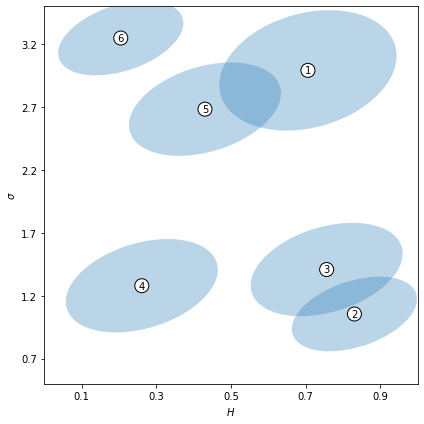

In [6]:
fig_4,ax=plt.subplots(figsize=(6.,6.))


w,v=np.linalg.eig(estimator_2d2d_2.covar)

ell_size=2.*np.sqrt(w)

ell_angle=np.arctan2(v[1,0],v[0,0])*180./np.pi




ax.set_xlim(0,1)
ax.set_ylim(0.5,3.5)



ell=Ellipse((taurus_table["H_est"],taurus_table["sigma_est"]),ell_size[0],ell_size[1],ell_angle)
ell.set_alpha(0.3)

ax.add_artist(ell)
ax.text(taurus_table["H_est"],taurus_table["sigma_est"],6,ha="center",va="center",bbox=bbox_props)


ell=Ellipse((ic348_table["H_est"],ic348_table["sigma_est"]),ell_size[0],ell_size[1],ell_angle)
ell.set_alpha(0.3)

ax.add_artist(ell)
ax.text(ic348_table["H_est"],ic348_table["sigma_est"],2,ha="center",va="center",bbox=bbox_props)


w,v=np.linalg.eig(estimator_2d2d_1.covar)

ell_size=2.*np.sqrt(w)

ell_angle=np.arctan2(v[1,0],v[0,0])*180./np.pi

print(ell_size)



ell=Ellipse((chai_table["H_est"],chai_table["sigma_est"]),ell_size[0],ell_size[1],ell_angle)
ell.set_alpha(0.3)

ax.add_artist(ell)
ax.text(chai_table["H_est"],chai_table["sigma_est"],5,ha="center",va="center",bbox=bbox_props)


ell=Ellipse((ophiuchus_table["H_est"],ophiuchus_table["sigma_est"]),ell_size[0],ell_size[1],ell_angle)
ell.set_alpha(0.3)

ax.add_artist(ell)
ax.text(ophiuchus_table["H_est"],ophiuchus_table["sigma_est"],3,ha="center",va="center",bbox=bbox_props)

ell=Ellipse((ic2391_table["H_est"],ic2391_table["sigma_est"]),ell_size[0],ell_size[1],ell_angle)
ell.set_alpha(0.3)

ax.add_artist(ell)
ax.text(ic2391_table["H_est"],ic2391_table["sigma_est"],4,ha="center",va="center",bbox=bbox_props)


w,v=np.linalg.eig(estimator_2d2d_0.covar)

ell_size=2.*np.sqrt(w)

ell_angle=np.arctan2(v[1,0],v[0,0])*180./np.pi

ell=Ellipse((lupus3_table["H_est"],lupus3_table["sigma_est"]),ell_size[0],ell_size[1],ell_angle)
ell.set_alpha(0.3)


ax.add_artist(ell)
ax.text(lupus3_table["H_est"],lupus3_table["sigma_est"],1,ha="center",va="center",bbox=bbox_props)

ax.set_xticks(np.linspace(0.1,0.9,5))
ax.set_yticks(np.linspace(0.7,3.2,6))

ax.set_xlabel(r"$H$")
ax.set_ylabel(r"$\sigma$")

fig_4.tight_layout()
plt.show()

## Importing a 3D cluster

We require a numpy array of cluster members with shape ($N_\star$,3), with units of parsecs. In this example, I'm going to generate a random distribution of points, but you can import your Orion data.

In [29]:
# generate something clumpy
fbm_model=cluster_model("3d3d")
H=0.
sigma=5.
N=683


# generate fBm field
#field=fbm_model.fbm_field(H,sigma)



# generate fBm cluster
#stars=fbm_model.fbm_cluster(N,field).r

# you can swap "stars" for the orion positions here

# set taurus positions
stars=np.loadtxt("taurus_coord.dat")

# order positions by distance to centre
stars_mean=stars.mean(axis=0).reshape((1,3))
order=np.argsort(((stars-stars_mean)**2).sum(axis=1))
stars=stars[order,:]

# get N_centile percent of inner most stars
N_centile=98
i_max=int(stars.shape[0]*N_centile/100)
stars=stars[:i_max,:]



# convert numpy array "stars" into a star cluster object
# this will whiten your distribution of stars too
cluster=star_cluster(stars)

Generating Delaunay triangulation.
Converting triangulation to sparse matrix format.
Generating minimum spanning tree.
All graphs generated.


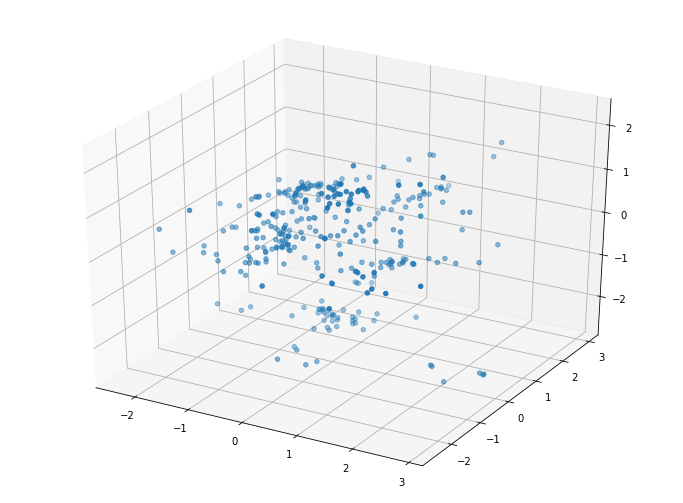

In [30]:
# plot cluster
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(12,9))
ax=fig.add_subplot(111, projection='3d')
im=ax.scatter(cluster.r[:,0],cluster.r[:,1],cluster.r[:,2])

## Estimating the $H$ and $\sigma$

We can now convert the cluster positions into a set pandas row, and attempt to estimate the parameters.

In [31]:
# make pandas row of cluster statistics
cluster_table=cluster.make_table_row()

# estimate params and add them to row
estimator_3d3d_2.estimate_params(cluster_table)

# print all the things!
print(cluster_table)


   N_star    R_hull    m_mean      m_m2     m_m3      m_m4    s_mean  \
0   328.0  3.658008  1.631692  1.380212  1.74646  2.370331  2.221468   

       s_m2      s_m3      s_m4     H_est  sigma_est  
0  1.032027  0.607358  1.314713  0.194016   3.445089  


Text(0, 0.5, 'H_est')

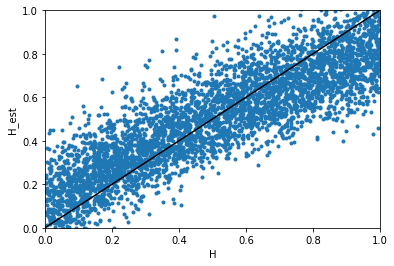

In [10]:
H_true=estimator_3d3d_2.test_data["H"]
H_est=estimator_3d3d_2.test_data["H_est"]

plt.figure()
plt.scatter(H_true,H_est,marker=".")
plt.plot([0,1],[0,1],c="black")
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("H")
plt.ylabel("H_est")

Text(0, 0.5, 'sigma_est')

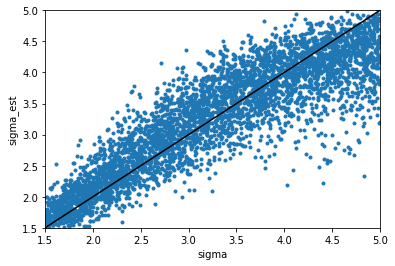

In [11]:
sigma_true=estimator_3d3d_2.test_data["sigma"]
sigma_est=estimator_3d3d_2.test_data["sigma_est"]

plt.figure()
plt.scatter(sigma_true,sigma_est,marker=".")
plt.plot([1.5,5],[1.5,5],c="black")
plt.xlim(1.5,5)
plt.ylim(1.5,5)
plt.xlabel("sigma")
plt.ylabel("sigma_est")